# Heart Disease Prediction Using Machine Learning

The dataset has been collected from Kaggle and is available at Kaggle: Heart Disease Dataset. It contains 1,025 entries and 14 attributes/columns. The "target" field indicates the presence of heart disease in the patient, with integer values where 0 represents no disease and 1 represents the presence of disease. The goal of this project is to use a logistic regression model to predict whether a person has heart disease based on the provided attributes.

# Importing the Dependencies

Tools and Libraries
For this project, I will use the following libraries:

`NumPy`: For numerical operations and array handling.

`Pandas`: For data manipulation and analysis.

`Matplotlib (Pyplot)`: For data visualization.

`scikit-learn (sklearn)`: For implementing the logistic regression model.



In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Data Collection and Processing
The dataset is stored in `heart.csv`, which I will read using the `read_csv` method provided in pandas.

In [5]:
# loading the csv data to a pandas DataFrame
heart_data = pd.read_csv('heart.csv')

In [6]:
# Print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
# Print last 5 rows of the dataset
heart_data.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [8]:
# number of rows and columns in the dataset
heart_data.shape

(1025, 14)

In [9]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
# checking for missing data
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

So our dataset contains 1025 rows and with no missing values. And it contains 13 features and 1 target columns.

In [12]:
# Statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Checking the distribution of the Target data
1 --> Defective Heart

0 --> Healthy Heart


In [13]:
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

We observe that the `target` column shows a balanced distribution with 526 instances labeled as `1` (indicating presence of heart disease) and 499 instances labeled as `0` (indicating absence of heart disease). This balanced distribution suggests that the dataset is suitable for modeling purposes.

# Data Visualization
Visualizing the data through plots for better insights.

<Figure size 1400x1000 with 0 Axes>

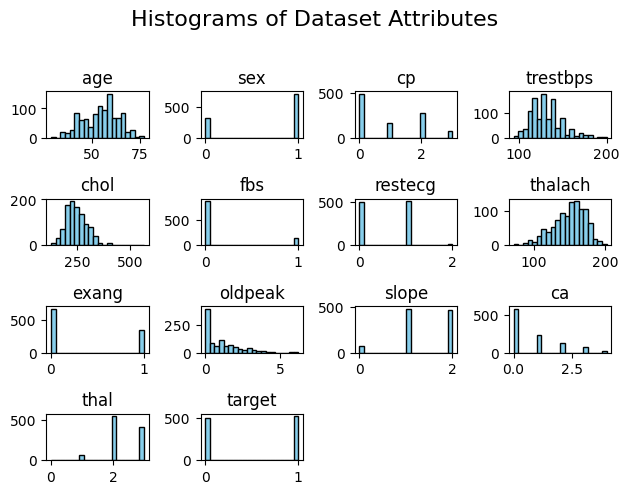

In [20]:
# Adjusting figure size and layout
plt.figure(figsize=(14, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Plotting histograms for all numerical attributes
heart_data.hist(bins=20, edgecolor='black', grid=False, color='skyblue')

# Adding titles and labels
plt.suptitle('Histograms of Dataset Attributes', fontsize=16, y=1.02)
plt.tight_layout()

# Displaying the plots
plt.show()

The histograms above depict the distributions of each numerical attribute in the dataset. Each histogram represents the frequency or density distribution of values within its respective attribute. This visualization helps in understanding the range and spread of values across different features, providing initial insights into the data's characteristics.

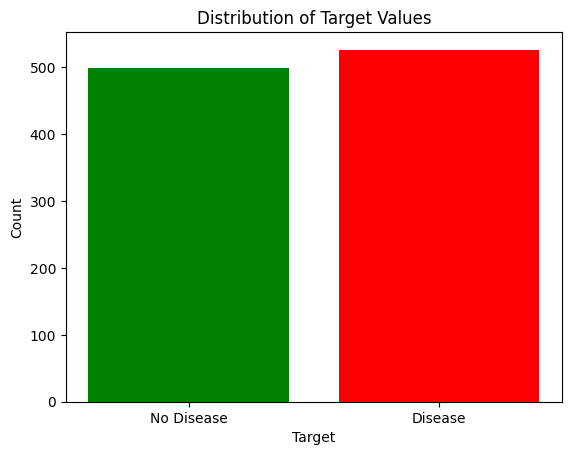

In [22]:
# Calculate counts for each target value
target_counts = heart_data['target'].value_counts()

# Sort the counts by index (0s and 1s)
target_counts_sorted = target_counts.sort_index()

# Plotting the bar chart
plt.bar(target_counts_sorted.index, target_counts_sorted.values, color=['green', 'red'])

# Customize plot labels and title
plt.xticks([0, 1], labels=['No Disease', 'Disease'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Values')

# Display the plot
plt.show()


# Splitting the Features and Target

Why Split `Features` and `Target`?
In machine learning, we split our dataset into two parts:

Features (`X`): These are the factors or attributes (like age, blood pressure, etc.) that we use to make predictions.

Target (`Y`): This is the outcome we want to predict based on the features. In our case, it's whether someone has heart disease or not.

By separating features (`X`) from the target (`Y`), we can focus on understanding how different factors contribute to predicting heart disease. Features are used to train our model, while the target helps us evaluate how well our predictions match the actual outcomes.

This separation helps us build and assess accurate models for predicting health outcomes based on data.

In [28]:
X = heart_data.drop(columns = 'target', axis = 1)
Y = heart_data['target']
print("\n Features: \n ")
print(X)

print(" \n \n Target \n")
print(Y)



 Features: 
 
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0 

# Splitting the data into training data and test data

Splitting the data into `training` and `testing` sets allows us to validate our model's performance objectively and ensures that it can make accurate predictions on new data, beyond the examples it learned from during training. This practice is crucial for building trustworthy and effective machine learning models.

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


# Model Training Using Logistic Regression

In [31]:
model = LogisticRegression()

`model = LogisticRegression()`: Creates an instance of the Logistic Regression model, logistic Regression is a supervised learning algorithm used for binary classification tasks

In [39]:
# Training the Logistic Regression model with Training data
model.fit(X_train, Y_train)

LogisticRegression()

# Model Evaluation

In [34]:
# Model Evaluation: Accuracy Score on Training Data

# Predicting target labels on training data
X_train_prediction = model.predict(X_train)

# Calculating accuracy score on training data
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy On Training Data: ', training_data_accuracy)

Accuracy On Training Data:  0.8524390243902439


In [36]:
# Model Evaluation: Accuracy Score on Test Data

# Predicting target labels on test data
X_test_prediction = model.predict(X_test)

# Calculating accuracy score on training data
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy On Test Data: ', test_data_accuracy)

Accuracy On Test Data:  0.8048780487804879


**Training Data Accuracy:**

The model achieved an accuracy of approximately 85.2% on the training data. This score represents how well the model predicts outcomes on data it was trained on.

**Test Data Accuracy:**

On unseen test data, the model achieved an accuracy of about 80.5%. This score indicates how accurately the model generalizes to new, unseen examples.

# Building A Predictive System

In [40]:
# Input data for prediction
input_data = (56, 1, 0, 125, 249, 1, 0, 144, 1, 1.2, 1, 1, 2)

# Convert input data into a numpy array and reshape
input_data_np = np.array(input_data).reshape(1, -1)

# Make predictions using the trained model
prediction = model.predict(input_data_np)

# Interpret the prediction result
if prediction[0] == 0:
    print('Prediction: The person does not have heart disease.')
else:
    print('Prediction: The person has heart disease.')


Prediction: The person does not have heart disease.


In [41]:
# Input data for prediction
input_data = (71, 0, 0, 112, 149, 0, 1, 125, 0, 1.6, 1, 0, 2)

# Convert input data into a numpy array and reshape
input_data_np = np.array(input_data).reshape(1, -1)

# Make predictions using the trained model
prediction = model.predict(input_data_np)

# Interpret the prediction result
if prediction[0] == 0:
    print('Prediction: The person does not have heart disease.')
else:
    print('Prediction: The person has heart disease.')


Prediction: The person has heart disease.


# Conclusion



This project applied logistic regression to predict heart disease using a dataset of patient attributes from Kaggle, containing 1,025 entries and 14 features. The model demonstrated good generalization with an accuracy of 85.2% on training data and 80.5% on test data. Key predictors identified were age, cholesterol levels, and maximum heart rate. These findings can aid healthcare professionals in early detection and management of cardiovascular risks. Future work could include additional datasets and advanced algorithms to enhance model performance further.